#TASK1 - Prediction Using Supervised ML
#By KABILAN V


In this task, I will be predicting the precentage of a student based on number of study hpurs using linear regression

**Importing Libraries**

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as pt
import seaborn as sns

In [3]:
df =  pd.read_csv("http://bit.ly/w-data")

Taking a look at the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Checking for null values

In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Visualizing the dataset

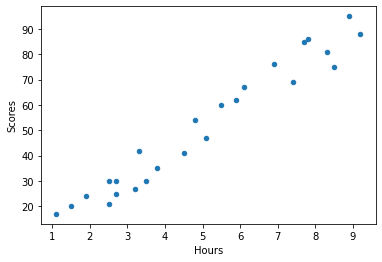

In [9]:
df.plot(kind='scatter', x='Hours' , y = 'Scores')
pt.show()

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


We can see that Hours and Scores have a very high positive correlation and therefore it would be possible for us to create a linear regression model with high accuracy

**Splitting the data into train and test data using test_train_split()**

In [11]:
X_train , X_test , y_train , y_test = train_test_split( df.Hours, df.Scores , test_size = 0.2 , random_state = 0)

**Visualizing the model**

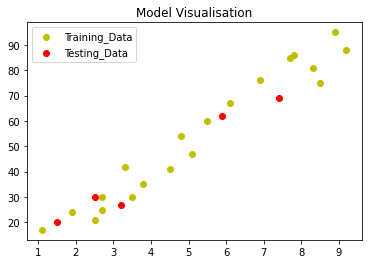

In [13]:
pt.scatter(X_train , y_train , label = 'Training_Data' , color='y')
pt.scatter(X_test , y_test , label = 'Testing_Data' , color='r')
pt.legend()
pt.title("Model Visualisation")
pt.show()

**Training the model using Linear Regression**

In [14]:
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicting the values using the model**

In [15]:
prediction = lr.predict(X_test.values.reshape(-1,1))
prediction

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**Comparing Original Values with Predicted Values**

In [17]:
df1 = pd.DataFrame({'Actual values': y_test, 'Predicted values': prediction})  
df1

,Actual values,Predicted values
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


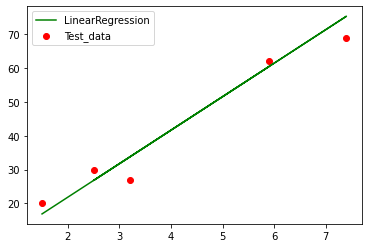

In [19]:
pt.plot(X_test , prediction , label = 'LinearRegression' , color = 'g')
pt.scatter (X_test , y_test , label = 'Test_data' , color = 'r'  )
pt.legend()
pt.show()

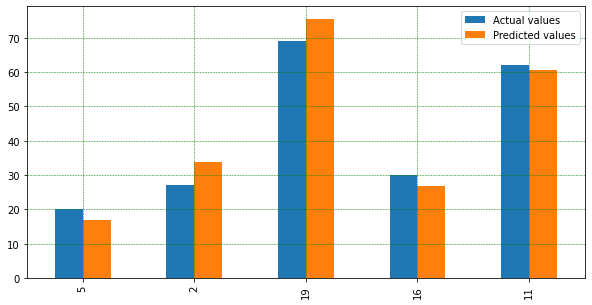

In [21]:
g = df1.head()
g.plot(kind='bar',figsize=(10,5))
pt.grid(which = 'both', color='g', linestyle='--', linewidth=0.5)
pt.show()

**Evaluating fitness of the model**

In [23]:
mean_sq_error = mean_squared_error(y_test, prediction)
print("The Mean Squared Error is",mean_sq_error)

mean_abs_error = mean_absolute_error(y_test, prediction)
print("The Mean Absolute Eror is", mean_abs_error)

The Mean Squared Error is 21.598769307217456
The Mean Absolute Eror is 4.183859899002982


**Predicting the score if a student studies 9.25 hours/day**

In [25]:
predicted_score = lr.predict([[9.25]])
print('Predicted Score if a student studies 9.25 hours/day is:', predicted_score)

Predicted Score if a student studies 9.25 hours/day is: [93.69173249]


**Testing the accuracy of the prediction using r2_score**

In [27]:
r2 = r2_score(y_test,prediction)
accuracy = r2*100
print("The accuracy for the prediction of the model is: ",accuracy)

The accuracy for the prediction of the model is:  94.54906892105353
